In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [9]:
# Load the Titanic dataset
data = pd.read_csv('Titanic.csv')

In [10]:
# Preprocess the data
# Drop 'Survived' and other non-numeric columns
data = data.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)


In [12]:
# Handle missing values by imputing them with the mean
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data)

In [13]:
# Standardize the data (important for k-means)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)

In [16]:
# Perform k-means clustering with an explicit value of n_init
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
data['Cluster'] = kmeans.fit_predict(data_scaled)

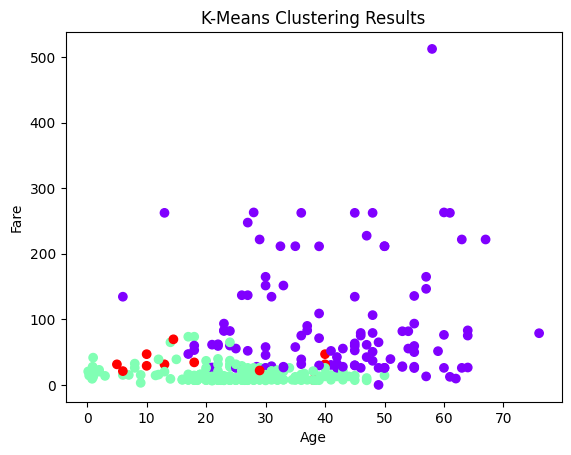

In [17]:
# Visualize the results using a scatter plot
plt.scatter(data['Age'], data['Fare'], c=data['Cluster'], cmap='rainbow')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('K-Means Clustering Results')
plt.show()